# 1. Ensemble Methods - From Single Models to Powerful Combinations

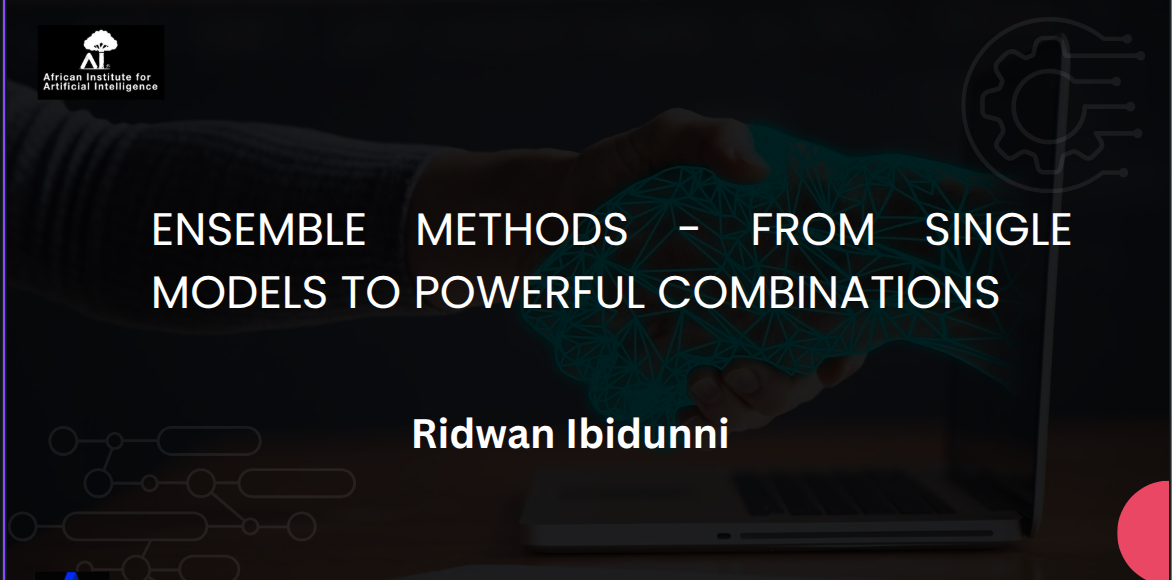

## Learning Path Connection

Previous Journey: We've mastered individual algorithms:

- **Regression: Linear → Polynomial → Regularized (Ridge/Lasso)**

- **Classification: Logistic Regression → SVM → Decision Trees**





> **Today's Evolution:** Instead of choosing ONE algorithm, what if we could combine the strengths of MULTIPLE algorithms?



### The Classification Method Spectrum

Simple → Complex
Logistic Regression → SVM (Linear) → SVM (RBF) → Ensemble Methods


# Real-World Problem: Employee Attrition Prediction

### **Business Context:** A multinational tech company is experiencing high employee turnover (18% annually). HR wants to predict which employees are likely to leave so they can implement targeted retention strategies.







**Why This Dataset?**

- **Complex Patterns:** Employee attrition depends on salary, work-life balance, career progression, job satisfaction, and demographic factors
- **Non-linear Relationships:** A single algorithm might miss subtle interactions
- **Business Impact:** Replacing a skilled employee costs 50-200% of their annual salary

## The Ensemble Philosophy: "Wisdom of Crowds"
### Why Single Models Fail

- Individual Algorithm Limitations:
- Logistic Regression: Assumes linear relationships
- Decision Trees: Prone to overfitting, unstable
- SVM: Struggles with large feature spaces

## The Ensemble Advantage

### **Core Principle:** Combine predictions from multiple diverse models to reduce:

- Bias: Systematic errors from oversimplified assumptions
- Variance: Instability from sensitivity to training data changes
- Noise: Random errors in individual predictions

# Data Acquisition and Initial Inspection

**Dataset:** IBM HR Analytics Employee Attrition Dataset
[Source:](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load IBM HR Analytics Dataset
url = "https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/emp_attrition.csv"
data = pd.read_csv(url)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
column_to_drop = ['DailyRate', 'MonthlyRate', 'Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber']
data.drop(column_to_drop, axis = 1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Quick overview
print(f"Dataset shape: {data.shape}")
print(f"\nAttrition Distribution:")
print(data['Attrition'].value_counts())
print(f"\nAttrition Rate: {data['Attrition'].value_counts()['Yes']/len(data)*100:.1f}%")

data.describe().T

Dataset shape: (1470, 35)

Attrition Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition Rate: 16.1%


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
# Check data types and missing values
print(f"\nData types:\n{data.dtypes}")
print(f"\nMissing values: {data.isnull().sum().sum()}")


Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

# Data Preprocessing for Ensemble Success

In [ ]:
#automatically select the categorical features without the target variable
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Attrition')

In [ ]:
categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
#automatically select the numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

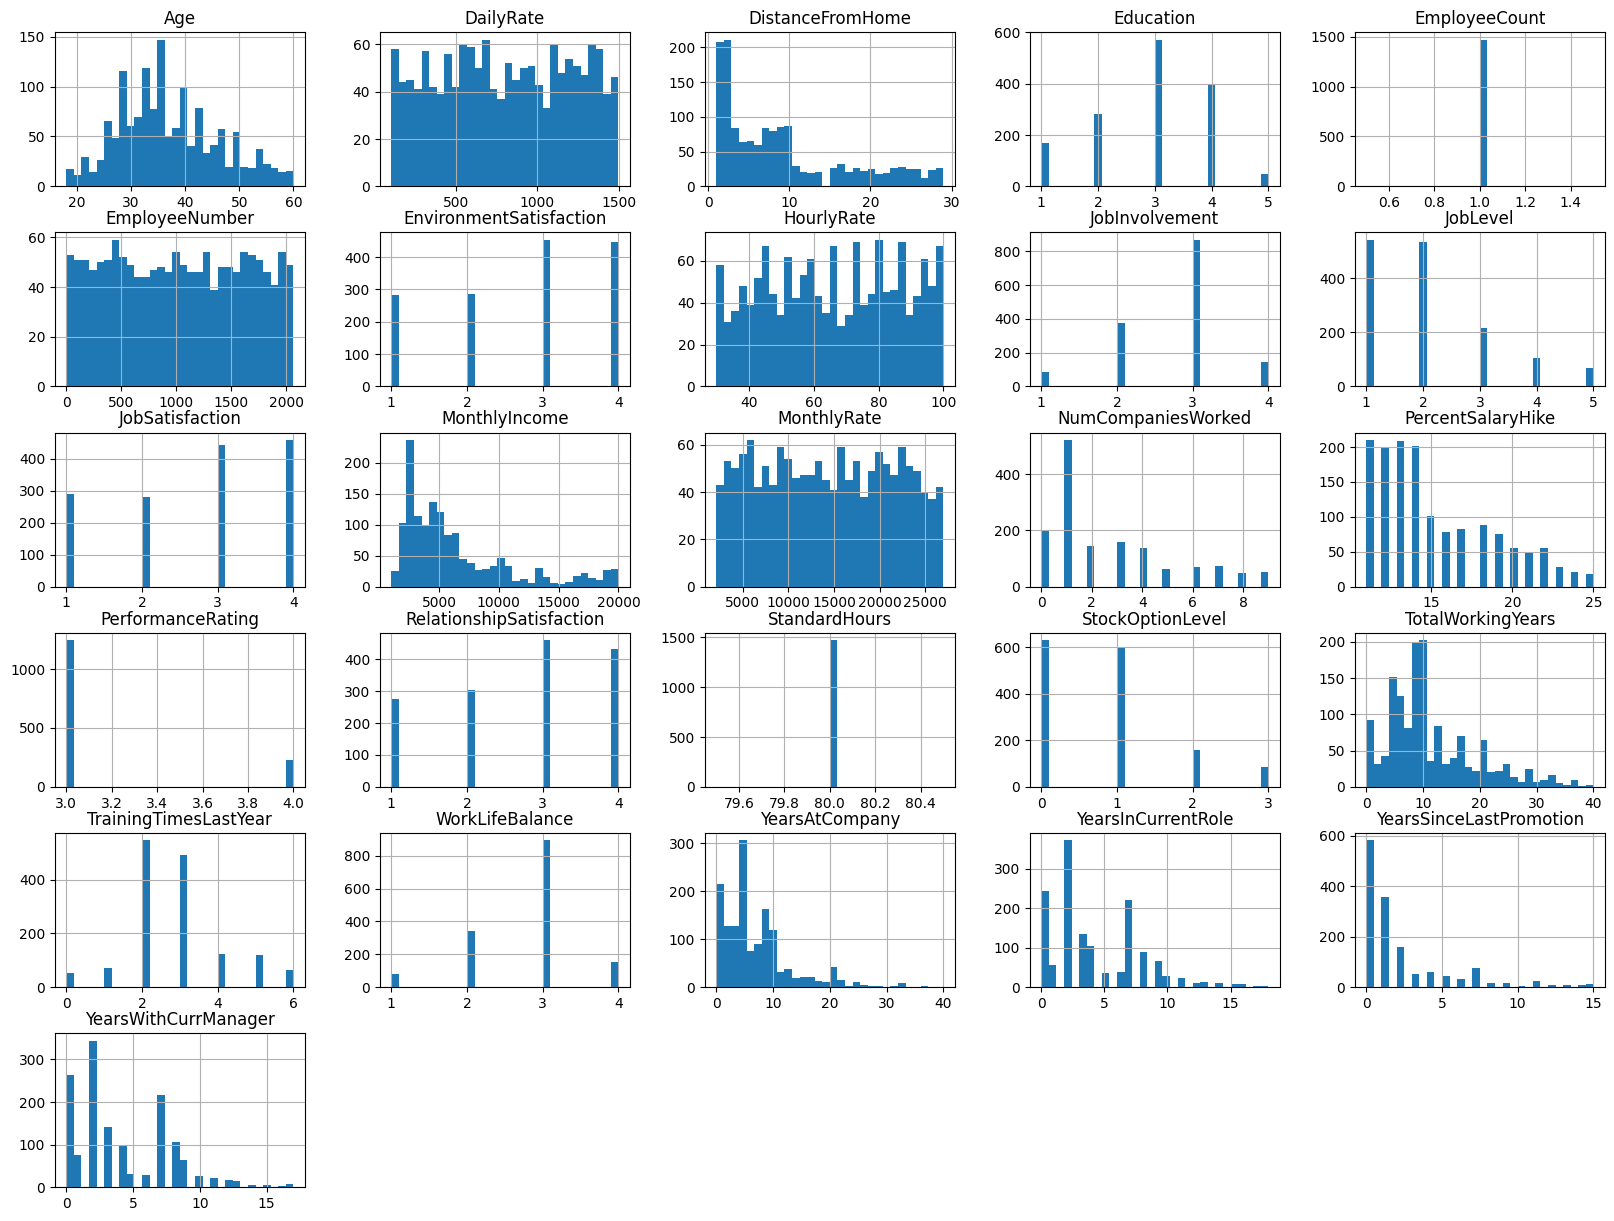

In [ ]:
data[numerical_features].hist(bins= 30, figsize=(20, 15))


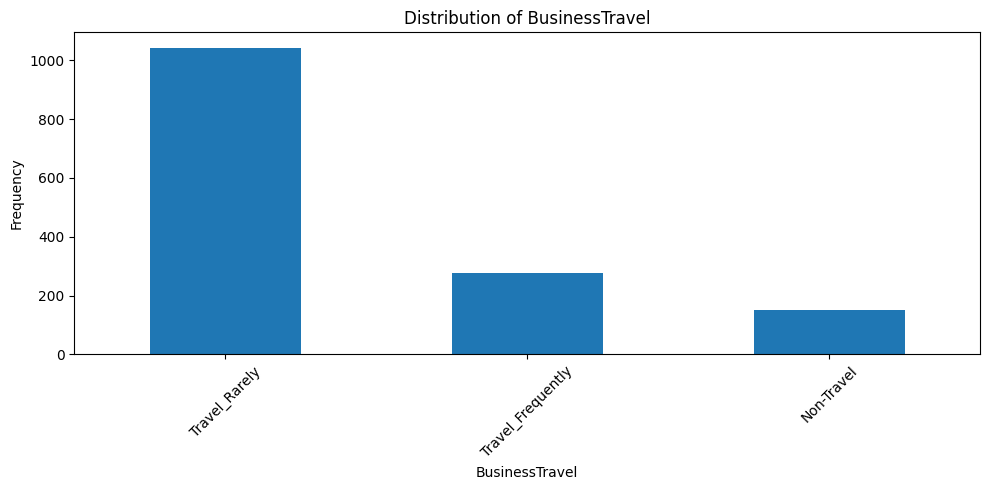

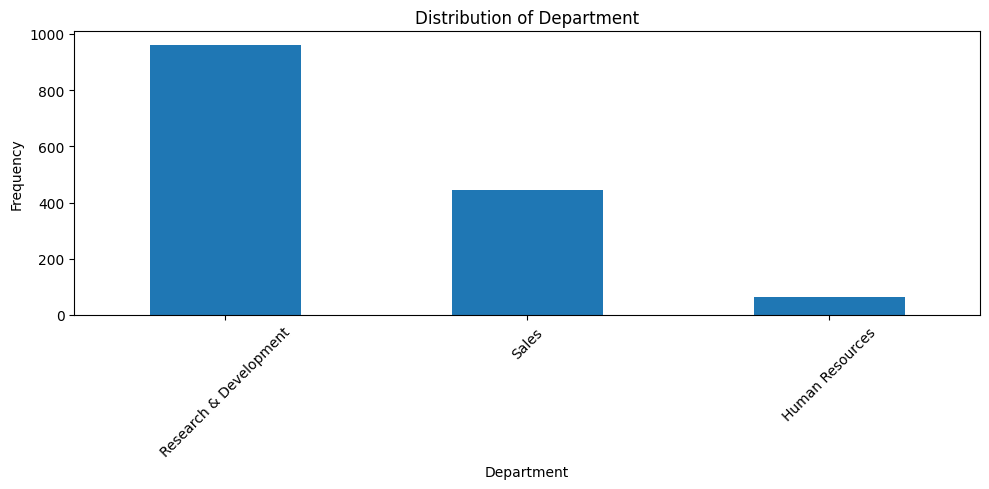

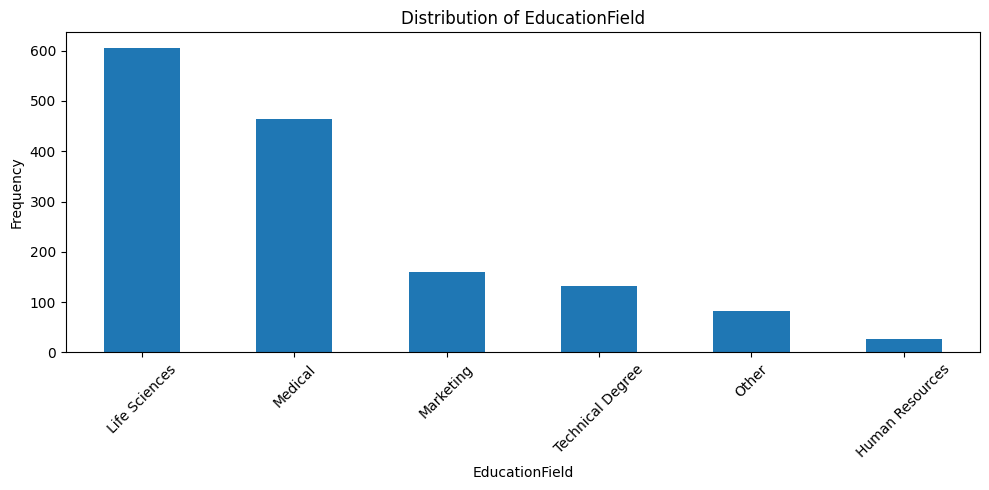

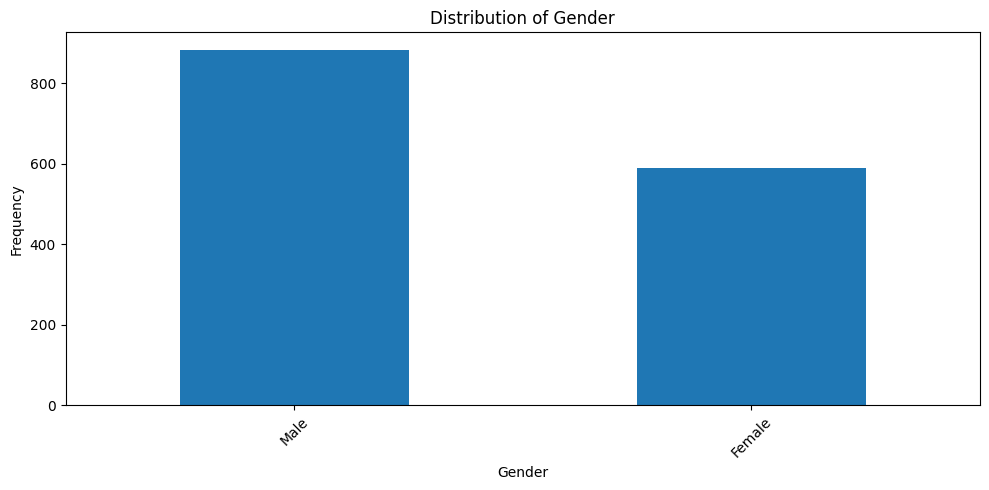

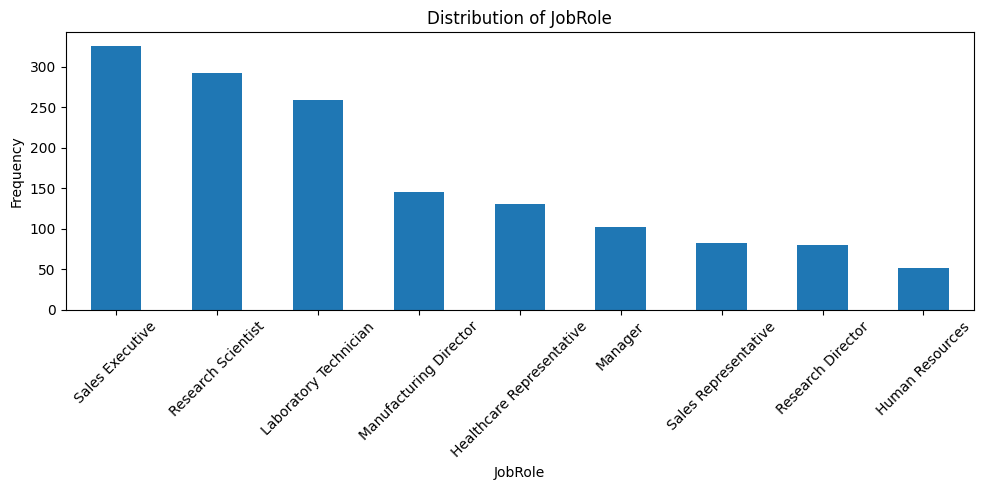

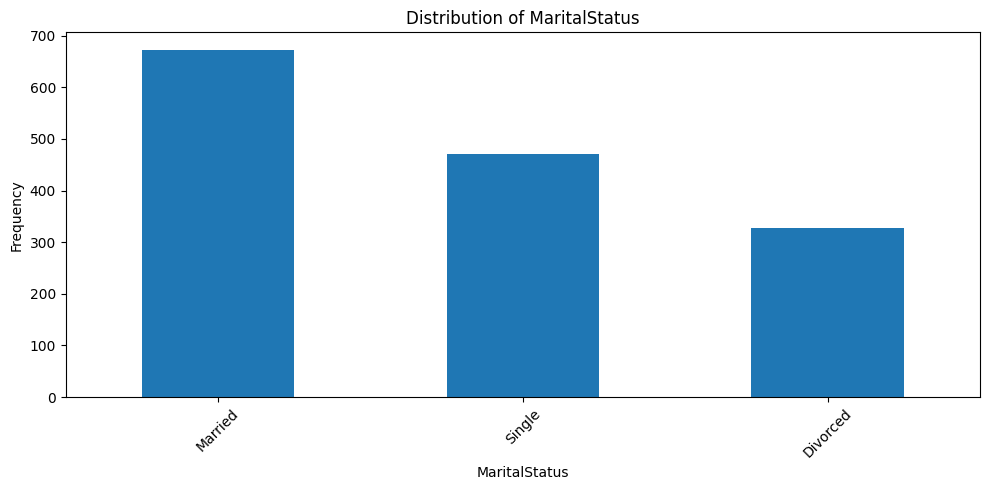

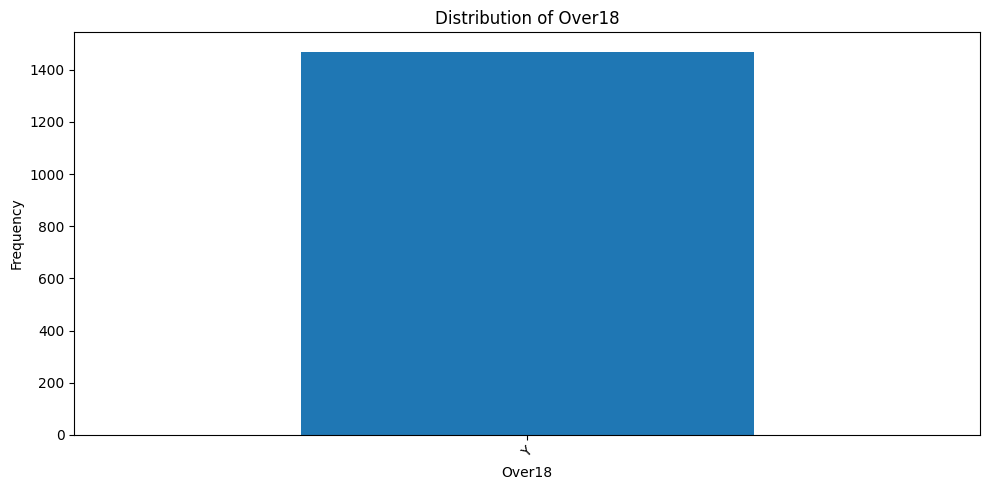

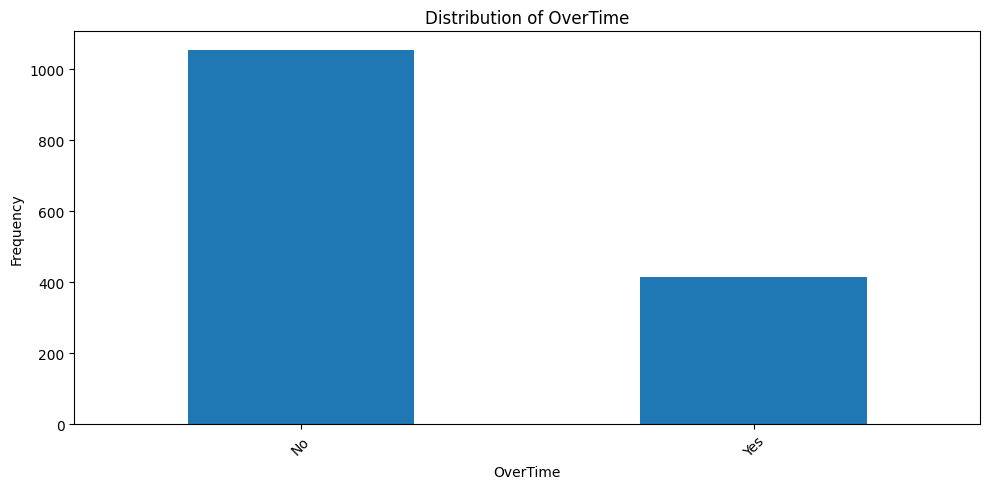

In [ ]:
for features in categorical_features:
  plt.figure(figsize=(10, 5))
  count = data[features].value_counts()
  count.plot(kind = 'bar')
  plt.xlabel(features)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {features}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# Target variable distribution (Balance or imbalance classes)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


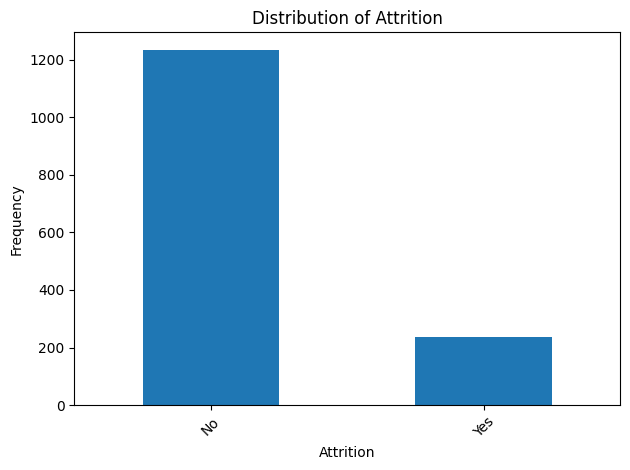

In [ ]:
count = data['Attrition'].value_counts()
count.plot(kind = 'bar')
plt.xlabel('Attrition')
plt.ylabel("Frequency")
plt.title("Distribution of Attrition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Preprocessing: Preparing for Classification

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)


    ]
)

In [ ]:
from sklearn.model_selection import train_test_split


X = data.drop(columns = 'Attrition', axis = 1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Ensemble Method 1: Decision Tree Vs Random Forest (Bagging)

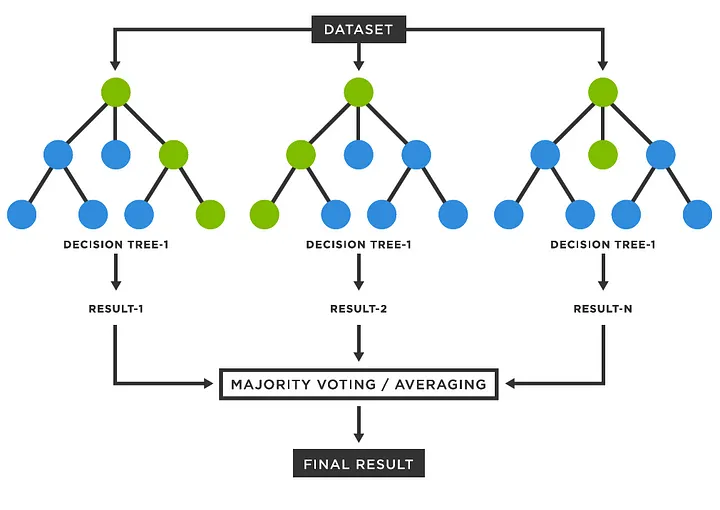

**The Bagging Philosophy**

**Bootstrap Aggregating (Bagging):**

1. Create multiple bootstrap samples from training data
2. Train a decision tree on each sample
3. Average predictions (regression) or vote (classification)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# build pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', DecisionTreeClassifier(class_weight="balanced"))
    ]
)

#fit model
model_pipeline.fit(X_train, y_train)


#make prediction
y_pred = model_pipeline.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.87      0.88       255
         Yes       0.23      0.26      0.24        39

    accuracy                           0.79       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.79      0.79       294



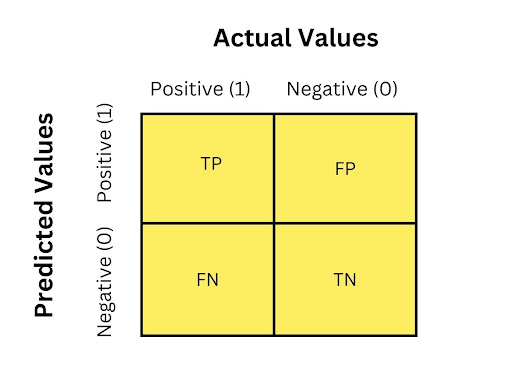

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[222  33]
 [ 29  10]]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# build pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', RandomForestClassifier(n_estimators=100, class_weight="balanced"))
    ]
)

#fit model
model_pipeline.fit(X_train, y_train)


#make prediction
y_pred = model_pipeline.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      1.00      0.94       255
         Yes       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[255   0]
 [ 35   4]]


# Ensemble Method 2: Gradient Boosting (XGBoost)

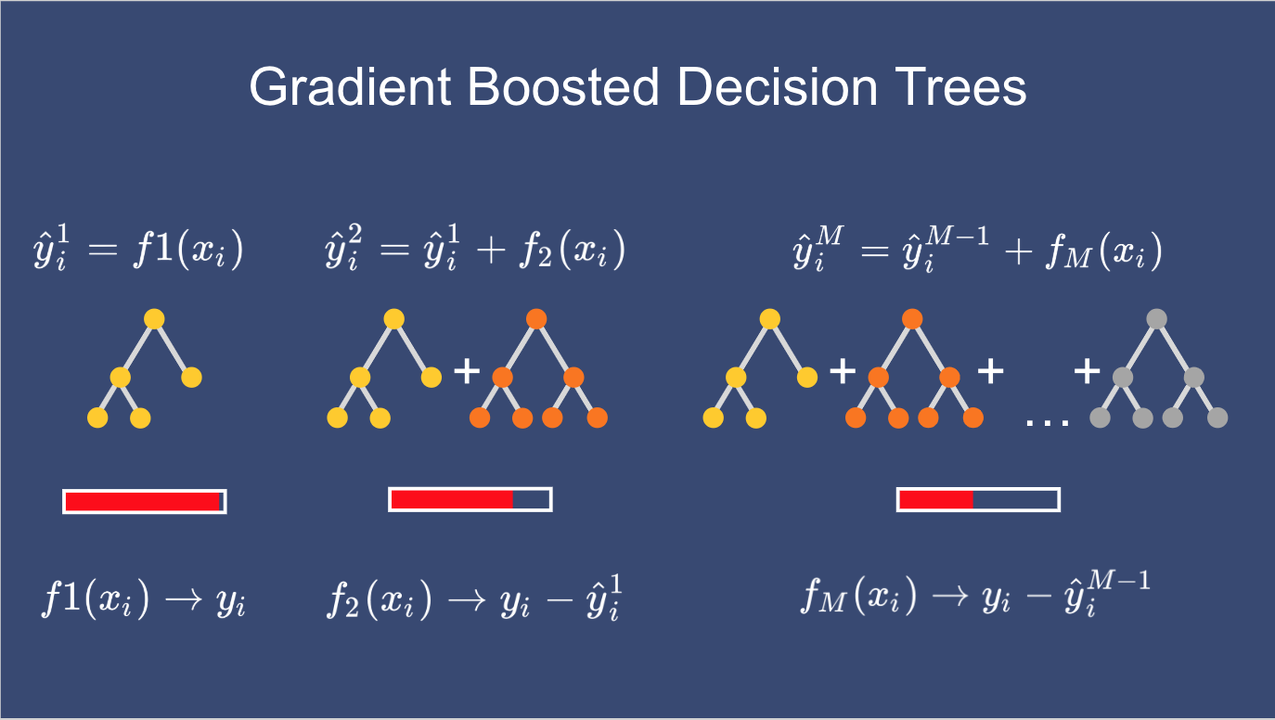

## **The Boosting Philosophy**

**Sequential Learning:**

- Start with a weak learner
- Focus on mistakes made by previous models
- Build new models to correct these errors
- Combine all models with weighted voting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# build pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1,max_depth=6,random_state=42))
    ]
)

#fit model
model_pipeline.fit(X_train, y_train)


#make prediction
y_pred = model_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.89      0.96      0.92       255
         Yes       0.42      0.21      0.28        39

    accuracy                           0.86       294
   macro avg       0.65      0.58      0.60       294
weighted avg       0.83      0.86      0.84       294



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[244  11]
 [ 31   8]]


# **Interactive Coding exercises**

*Follow the links below to practice all these concepts*


1.   [Hands_on_Practice](https://colab.research.google.com/drive/1WDz2P3bD3ok6lLQhG7--Opyha-DgeZ96?usp=sharing)




# **Practice Homework**

*Follow the link below for practice questions*

[African institute for Artificiall Intellgence - AI masterclass](https://github.com/aljebraschool/African-Institute-For-Artificial-Intelligence---AI-Masterclass)

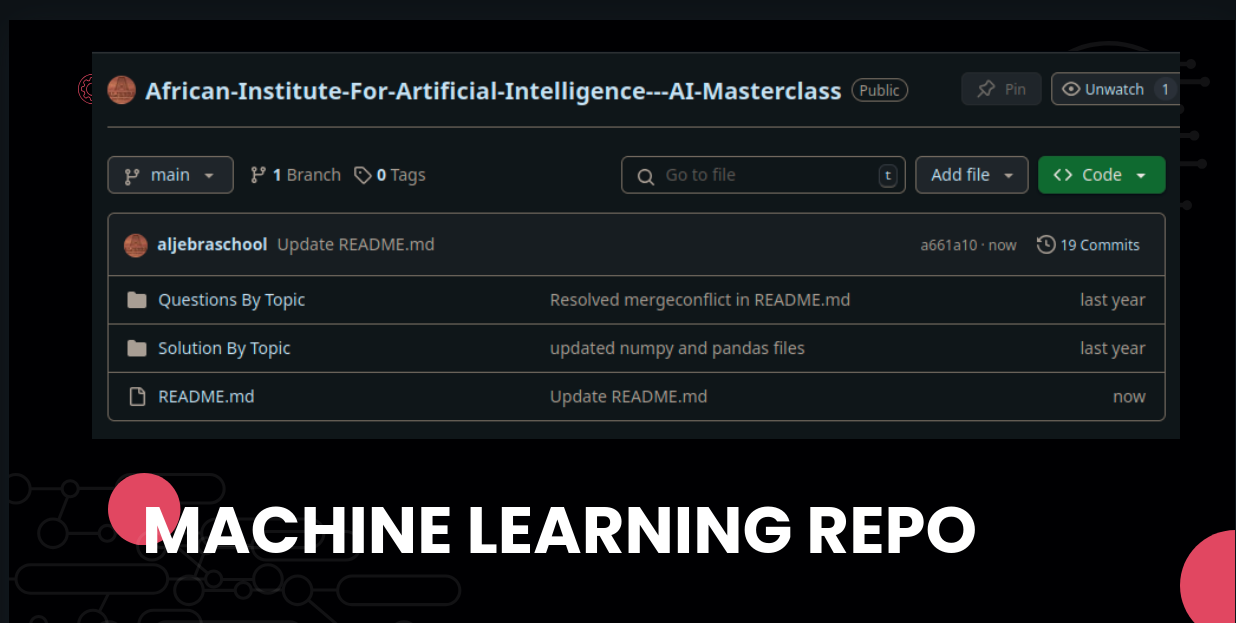

**Other social media links**



*   [Read more on the topic via my blog](https://aljebraschool.hashnode.dev)
*   [Follow me on Linkedin](https://linkedin.com/in/aljebraschool)

